# Find the Area Harvested for Crops

In [36]:
import pandas as pd
import os

In [37]:
%run Methods.ipynb

test_prepData (__main__.TestDataPrep) ... ok
test_withNA (__main__.TestDataPrep) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.031s

OK


In [38]:
pathToData = os.path.join(os.getcwd(), "Data", "Production_Crops_Livestock_E_All_Data.csv")
agData = pd.read_csv(pathToData, encoding="latin-1")

Does each item have area harvested element to it? 

In [39]:
itemCol = agData['Item']
elementCol = agData['Element']
itemToElementMap = {}

for item, element in zip(itemCol, elementCol):
    curSet = itemToElementMap.get(item, set())
    curSet.add(element)
    itemToElementMap[item] = curSet

Not every item will have yield or area harvested data. Pick out items with area harvested. 

In [40]:
itemsWithArea = set()
for item in itemToElementMap.keys():
    elements = itemToElementMap[item]
    if 'Area harvested' in elements:
        itemsWithArea.add(item)
print(itemsWithArea)

{'Mushrooms and truffles', 'Raspberries', 'Areca nuts', 'Carobs', 'Cherries, sour', 'Chillies and peppers, green', 'Lettuce and chicory', 'Fruit, citrus nes', 'Coir', 'Cloves', 'Jojoba seed', 'Leeks, other alliaceous vegetables', 'Vegetables, leguminous nes', 'Treenuts, Total', 'Grapes', 'Sesame seed', 'Tomatoes', 'Avocados', 'Fibre crops nes', 'Peas, dry', 'Asparagus', 'Walnuts, with shell', 'Fruit, tropical fresh nes', 'Barley', 'Watermelons', 'Beans, green', 'Quinces', 'Roots and tubers nes', 'Roots and Tubers, Total', 'Tobacco, unmanufactured', 'Kapok fruit', 'Chestnut', 'Tea', 'Hempseed', 'Hemp tow waste', 'Manila fibre (abaca)', 'Nutmeg, mace and cardamoms', 'Fruit Primary', 'Flax fibre and tow', 'Coconuts', 'Olives', 'Fonio', 'Brazil nuts, with shell', 'Anise, badian, fennel, coriander', 'Cauliflowers and broccoli', 'Groundnuts, with shell', 'Kiwi fruit', 'Karite nuts (sheanuts)', 'Pumpkins, squash and gourds', 'Melonseed', 'Vanilla', 'Oil palm fruit', 'Peas, green', 'Buckwheat'

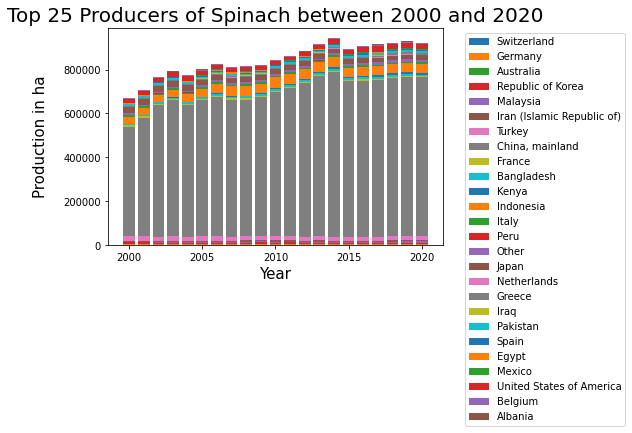

In [61]:
plotProductionCrop(agData, "Area harvested", "Spinach", 2000, 2020, 25, createPlotFunc=createStackBarPlot)

Plotting sorghum, Why does plot go up to 2020 if you do top 25 but only up to before 2015 if top 10?